In [1]:
## Import common python libraries
import numpy as np
import pandas as pd
import os

# For optimization
from scipy import optimize as opt

# Matplotlib for plotting figures
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

# ignoring Numpy error
np.seterr(all = 'ignore') 

# Where to save the figures
EXERCISE_ROOT_DIR = "."
IMAGES_PATH = os.path.join(EXERCISE_ROOT_DIR, "images")

In [2]:
# The function allows images to be saved
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
# load the preprocessed iris dataset
dataset = pd.read_csv('datasets/iris_process.data',
                      delimiter=',',
                      header=None, 
                      names=['sepal length', 'sepal width', 'petal length', 'petal width','class'])

print('\nNumber of records:',len(dataset))
print('\nclass domain:', dataset['class'].unique())
print('\n\n',dataset.head())


Number of records: 150

class domain: [0 1 2]


    sepal length  sepal width  petal length  petal width  class
0           5.1          3.5           1.4          0.2      0
1           4.9          3.0           1.4          0.2      0
2           4.7          3.2           1.3          0.2      0
3           4.6          3.1           1.5          0.2      0
4           5.0          3.6           1.4          0.2      0


In [4]:
X = pd.DataFrame(dataset,columns=['petal length','petal width']).values
y = dataset['class'].values
print('The shape of X:',X.shape)
print('The shape of y:',y.shape)

The shape of X: (150, 2)
The shape of y: (150,)


In [5]:
def plot_dataset(X,y):
    plt.scatter(X[y == 0, 0],X[y == 0, 1],
                s=50, c='lightgreen',
                marker='o', edgecolor='black',label='class 1')
    plt.scatter(X[y == 1, 0],X[y == 1, 1],
                s=50, c='blue',
                marker='v', edgecolor='black',
                label='class 2')
    plt.scatter(X[y == 2, 0],X[y == 2, 1],
                s=50, c='red',
                marker='s', edgecolor='black',
                label='class 3')
    plt.tight_layout()
    plt.xlabel("petal length", fontsize=14)
    plt.ylabel("petal width", fontsize=14)

Saving figure training_data


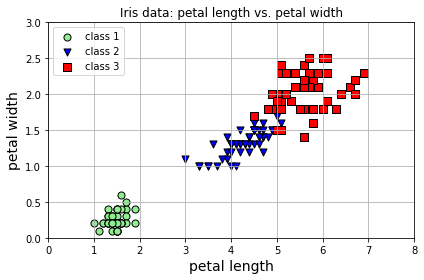

In [6]:
plt.figure(1)
plt.title('Iris data: petal length vs. petal width')
plot_dataset(X,y)
plt.grid(True)
plt.axis([0.0,8.0,0.0,3.0])
plt.legend()
save_fig("training_data")
plt.show()

In [7]:
def sigmoid(z):
    return 1/(1+ np.exp(-z))

In [8]:
def z(x, theta):
    return np.dot(x,theta)

In [9]:
def objective_function(theta, X, y,Lambda):
    h = z(X, theta)
    y_hat = sigmoid(h)
    error = (-1/len(y)) * (np.dot(y.T,np.log(y_hat)) + np.dot((1-y).T,np.log(1-y_hat)))
    reg_term = (Lambda/(2*len(y))) * np.sum(np.dot(theta[1:].T,theta[1:]));
    return  error + reg_term

In [10]:
def gradient_function(theta, X, y, Lambda):
    h = z(X, theta);
    y_hat = sigmoid(h);
    grad = (1/len(y)) * np.dot(X.T,(y_hat-y));
    temp=theta
    temp[0]=0
    reg_term= temp * Lambda/len(y)
    return grad + reg_term

In [11]:
def fit(X, y, num_labels, Lambda):
    X = np.insert(X,0,1,axis=1)
    all_theta = np.zeros((num_labels, X.shape[1]))
    print('\nInitializing optimization process ...\n')
    for c in range(num_labels):
        initial_theta= np.zeros((X.shape[1], 1));
        logic_y = np.array([1 if x==c else 0 for x in y])
        print('- Optimizing for class %d'% (c+1) +' ... DONE')
        args=(X,logic_y,Lambda)
        x0 = initial_theta
        opts = {'maxiter' : None, 'disp' : False} 
        result = opt.minimize(objective_function, x0, jac=gradient_function, args=args, method='CG', options=opts)
        all_theta[[c],:]= (result.x).T
    return all_theta

In [12]:
all_theta = fit(X, y, len(np.unique(y)), Lambda=1)


Initializing optimization process ...

- Optimizing for class 1 ... DONE
- Optimizing for class 2 ... DONE
- Optimizing for class 3 ... DONE


In [13]:
def predict(X,all_theta):
    X = np.insert(X,0,1,axis=1)
    return np.argmax(z(X, all_theta.T), axis=1)

In [14]:
y_hat = predict(X,all_theta)
print('\nUnique elements in Prediction: %s\n'%(np.unique(y_hat)))


Unique elements in Prediction: [0 1 2]



In [15]:
y_hat = predict(X,all_theta)
correct = [1 if a == b else 0 for (a, b) in zip(y_hat, y)]
accuracy = (sum(map(int, correct)) / float(len(correct)))
print('\nAccuracy: %.2f' % (accuracy * 100)+'%\n')


Accuracy: 96.67%



In [16]:
def plot_decision_boundary(X,y,all_theta):
    fig, ax = plt.subplots()
    plot_dataset(X,y)
    x_vals = np.array(ax.get_xlim())
    for theta in all_theta:
        y_vals = -1 * np.divide(((np.multiply(theta[1],x_vals)) + theta[0]),theta[2])
        plt.plot(x_vals, y_vals, '--',)
    plt.grid(True)

Saving figure decision_boudaries


<Figure size 432x288 with 0 Axes>

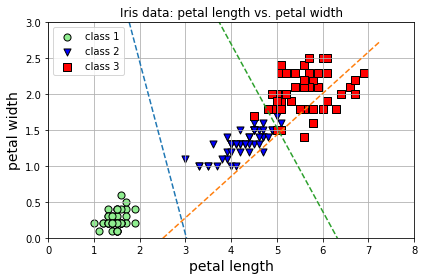

In [17]:
plt.figure(2)
plot_decision_boundary(X,y,all_theta)
plt.title('Iris data: petal length vs. petal width')
plt.axis([0.0,8.0,0.0,3.0])
plt.legend(loc="upper left")
save_fig("decision_boudaries")
plt.show()